# **Data Analysis 1**

## Objectives

- Conduct an initial examination of the dataset
- Determine if the numerical data of the dataset is normally distributed
- If the numerical data is not normally distributed, attempt to correct that
- Partially fulfil Business Requirement 1

## Inputs
- `student-exam-results.csv` file in `outputs/datasets/collection` directory

## Outputs
- Pandas Profile Report for the dataset
- KDE-histograms that enable visual determination of normal distribution
- Shapiro-Wilk Normal Distribution Test results to enable statistical determination of normal distribution
- QQ Plots and accompanying R2 scores to enable mathematical/visual determination of normal distribution
- An overall conclusion as to the distribution of the numerical data

## Additional Comments

This is the second notebook in this project, and the first conducts any operations on the dataset. It should be explicitly noted that we are starting the data analysis part of this project with an investigation into whether or not the numerical data is normally distributed because the Code Institute learning material I have studied in preparation for this project notes that we may expect it to be easier to train a machine learning model if the data it is being trained on is normally distributed. Models trained on normally distributed data may be expected to show better performance as well. It is therefore crucial that we establish whether or not the data is normally distributed as a priority, so that if it is not normally distributed, we can take appropriate measures to correct that.

## Import packages

In the code cell below, we will import the Python data science packages we need for our analyses:

In [1]:
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pingouin as pg
sns.set_theme(style="whitegrid")
%matplotlib inline

from feature_engine import transformation as vt
from sklearn.pipeline import Pipeline

# Change working directory

Since this notebook exists in the jupyter_notebooks directory, we need to change the current working directory from the jupyter_notebooks directory to the workspace, so that any directories created in further codes cells are added in the correct place. 

We access the current directory with the OS packages' `getcwd()` method

In [2]:
current_directory = os.getcwd()
current_directory

/workspace/.pip-modules/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


'/workspace/Exam-Scores-Analysis/jupyter_notebooks'

We now want to set the working directory as the parent of the current working directory, jupyter_notebooks

- The `os.path.dirname()` method gets the parent directory
- The `os.chir()` method defines the new current directory
- We do this to access all of the project's files and directories, rather than those in the jupyter_notebooks directory

In [3]:
os.chdir(os.path.dirname(current_directory))
print("You set a new current directory")

You set a new current directory


To make certain of things, we now use a code cell to confirm that we have set the current working directory properly

In [4]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis'

Excellent - we are now working in the main directory. We will now import the Python data science packages needed for this notebook:

## Load Data

First, we load the dataset output from the Data Collection notebook

In [5]:
df = pd.read_csv('outputs/datasets/collection/student-exam-results.csv')
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,67,67,63,65
1,female,group D,some high school,free/reduced,none,40,59,55,51
2,male,group E,some college,free/reduced,none,59,60,50,56
3,male,group B,high school,standard,none,77,78,68,74
4,male,group E,associate's degree,standard,completed,78,73,68,73


## Pandas Profile Report

We now want to become more familiar with the dataset. We can do this with a Pandas Profile Report.

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Profile report discussion

In the `gender` column, we see 517 records for male students and 483 records for female students. This indicates that the `gender` column's values are equally distributed, therefore a Machine Learning model that takes a student's gender as an input should not be biased one way or the other.

In the `ethnicity` column, we see that the ethnicities are imbalanced. This could be problematic, as a machine learning model that takes a student's ethnicity as an input would be more reliable when predicting test scores for Group C (323 records) than Group A (79 records).

In the `parental_education` column, we see that the `some college`, `associates degree`, `high school` and `some high school` categories are approximately equally distributed, however the `bachelor's degree` and `master's degree` categories contain fewer records. This could be problematic.

In the `lunch_program` column, we see that there are about twice as many `standard` entries as there are `free/reduced` entries. This could prove problematic.

In the `test_preparation_course` column, we see that there are about twice as many `none` entries as there are `completed` entries. This could prove problematic.

We then come to the numerical exam score variables. These appear to be normally distributed. We should check this using KDE-histograms. If these have bell-shapes, that is a good indicator of normal distribution.

## Distribution Analysis

In this section, we will check to see if the numerical variables of the dataset are, as the Profile Report suggests, normally distributed. First, lets plot some histograms that are larger than those in the profile report, and that have KDE lines.

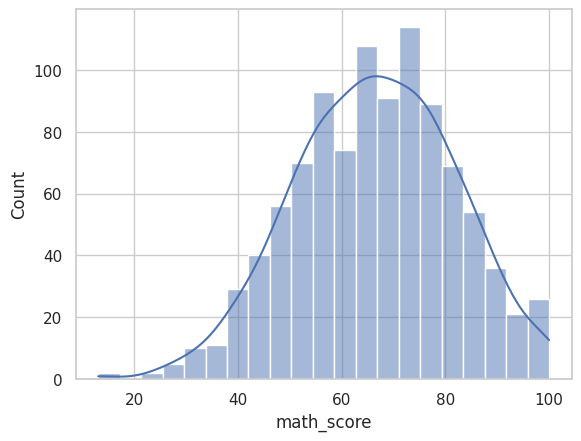

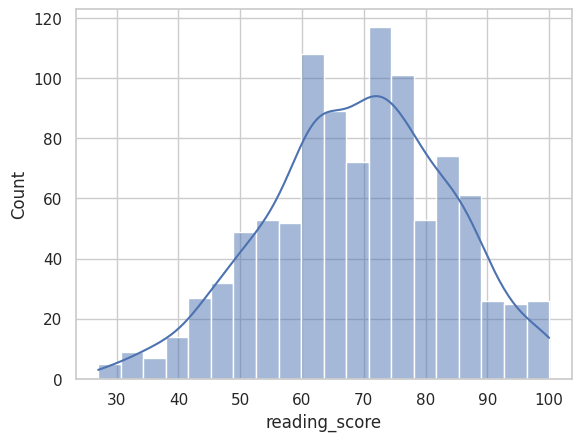

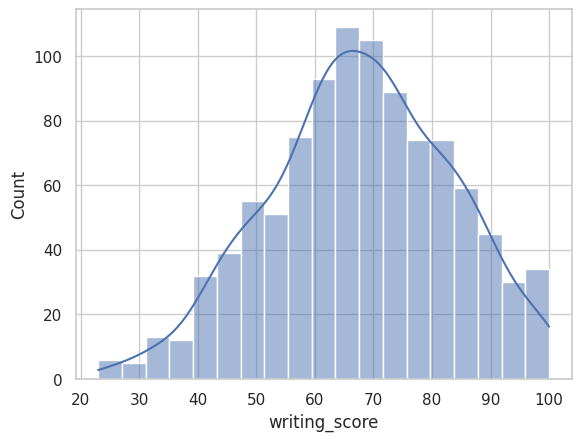

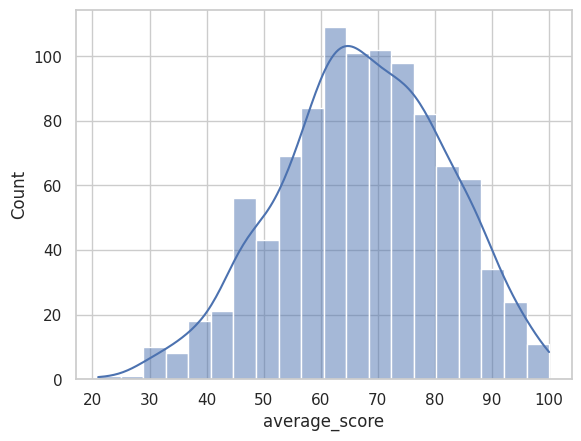

In [7]:
for column in df.columns[5:9]:
    sns.histplot(data=df, kde=True, x=column)
    plt.show()

The histograms have bell-shapes, and hence appear to show that the numerical variables are normally distributed. We can use the Pingouin library and the Shapiro-Wilk test to mathematically confirm this

In [8]:
df_shapiro_wilk = pg.normality(data=df, alpha=0.05)
df_shapiro_wilk

,W,pval,normal
math_score,0.995075,0.002504,False
reading_score,0.993004,0.000118,False
writing_score,0.993029,0.000123,False
average_score,0.993946,0.000454,False


This is an interesting result from the Shapiro-Wilk test. It appears that the plots were misleading us, and that the scores are not normally distributed. We could do some Numerical Data Transformation and use the Box-Cox or Yeo-Johnson transformers.

### Transformers

As a precaution, I will explore the results of the Box-Cox and Yeo-Johnson transformers. If the planned ML pipeline performs poorly on the standard data, we may ascribe this to the abnormally distributed data, and can then test it with the (hopefully) normally distributed data output from the Box-Cox and Yeo-Johnson transformers. Since the transformers are used in pipelines, we can apply a transformer as one of the first steps.

#### Box Cox Transformer

Let's define a transformer pipeline using the Box-Cox transformer

In [9]:
pipeline_box_cox = Pipeline([
    ('Box-Cox-Transformer', vt.BoxCoxTransformer())
])

df_box_cox = pipeline_box_cox.fit_transform(df)
df_box_cox.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,121.091609,162.702436,113.383625,143.938963
1,female,group D,some high school,free/reduced,none,65.421602,138.343992,96.411057,106.234436
2,male,group E,some college,free/reduced,none,104.072425,141.342768,86.028589,119.442519
3,male,group B,high school,standard,none,142.889175,197.481846,124.198855,169.279935
4,male,group E,associate's degree,standard,completed,145.098631,181.497357,124.198855,166.425182


The transformer appears to have only targeted the numerical variables. We will run the `info()` method to check that the categorical variable columns retain the object data-type.

In [10]:
df_box_cox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   ethnicity                1000 non-null   object 
 2   parental_education       1000 non-null   object 
 3   lunch_program            1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   math_score               1000 non-null   float64
 6   reading_score            1000 non-null   float64
 7   writing_score            1000 non-null   float64
 8   average_score            1000 non-null   float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


Excellent. The transformer has not targeted the categorical variables.

Now we can run the Shapiro-Wilk test on the results of the Box-Cox transformer to see if it has more normally distributed the data

In [11]:
pg.normality(data=df_box_cox, alpha=0.05)

,W,pval,normal
math_score,0.995915,0.009541,False
reading_score,0.994572,0.001154,False
writing_score,0.993813,0.000373,False
average_score,0.995235,0.003216,False


It appears that the Box-Cox transformer has failed to more normally distribute the data. We should see what the Yeo-Johnson transformer does.

#### Yeo-Johnson Transformer

In [12]:
pipeline_yeo_johnson = Pipeline([
    ('Yeo-Johnson-transformer', vt.YeoJohnsonTransformer())
])

df_yeo_johnson = pipeline_yeo_johnson.fit_transform(df)
df_yeo_johnson.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,124.995453,168.960662,117.198324,149.363122
1,female,group D,some high school,free/reduced,none,68.202992,143.936922,99.872523,110.681893
2,male,group E,some college,free/reduced,none,107.630870,147.017410,89.275144,124.231091
3,male,group B,high school,standard,none,147.239583,204.697330,128.240107,175.366811
4,male,group E,associate's degree,standard,completed,149.494580,188.271726,128.240107,172.437109


As with the Box-Cox transformer, we should check that the categorical variables have not been targeted:

In [13]:
df_yeo_johnson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   ethnicity                1000 non-null   object 
 2   parental_education       1000 non-null   object 
 3   lunch_program            1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   math_score               1000 non-null   float64
 6   reading_score            1000 non-null   float64
 7   writing_score            1000 non-null   float64
 8   average_score            1000 non-null   float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


Now we check if the data is normally distributed

In [14]:
pg.normality(data=df_yeo_johnson, alpha=0.05)

,W,pval,normal
math_score,0.995914,0.009538,False
reading_score,0.994581,0.001169,False
writing_score,0.993814,0.000374,False
average_score,0.995242,0.003250,False


This is disappointing - it seems both transformers have failed to normally distribute the data. However, this does not mean that the transformations are pointless - they may have improved the distribution and made the data more normally distributed without necessarily making it fully normally distributed. We can check this with Pinguoin QQ plots, paying particular attention to the R2 scores.

### QQ Plots

Lets construct QQ plots for the untransformed dataset:

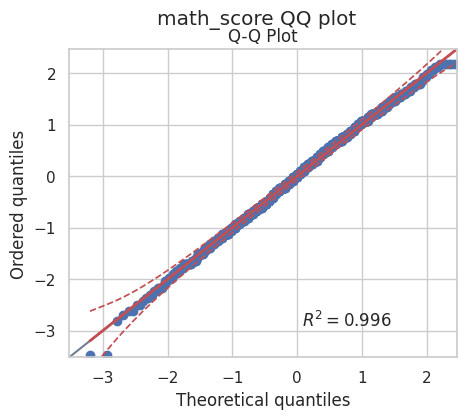

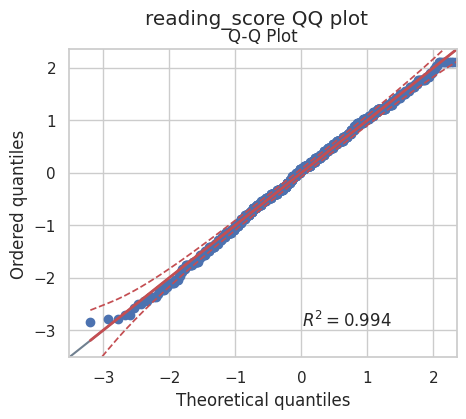

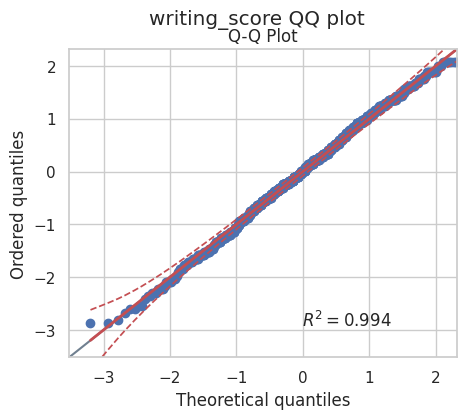

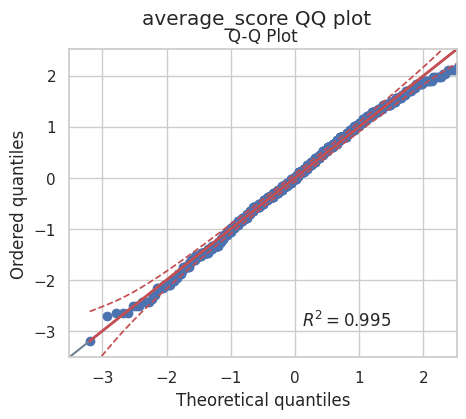

In [15]:
for column in df.columns[5:9]:
    pg.qqplot(df[column], dist='norm')
    plt.suptitle(f'{column} QQ plot')
    plt.show()

This is interesting - we appear to have numerical data that is not, according to the Shapiro-Wilk test, normally distributed. And yet, we have exceptionally good R2 values, which are a good indicator of normal distribution. However, if we pay attention to the upper tails of the QQ Plots, we see that the points are bending away from the line. At the lower tails of the QQ plots, there are some outliers.

We should see what the QQ plots of the transformations are:

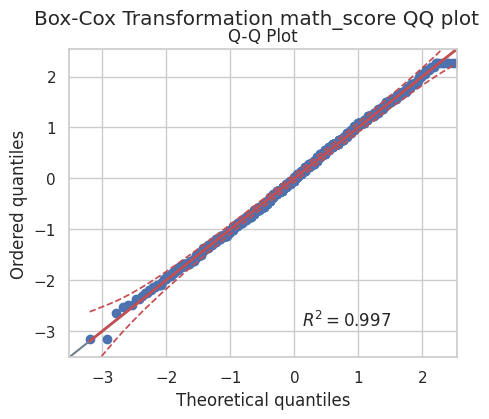

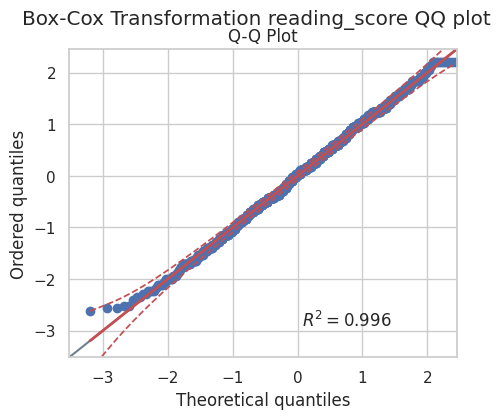

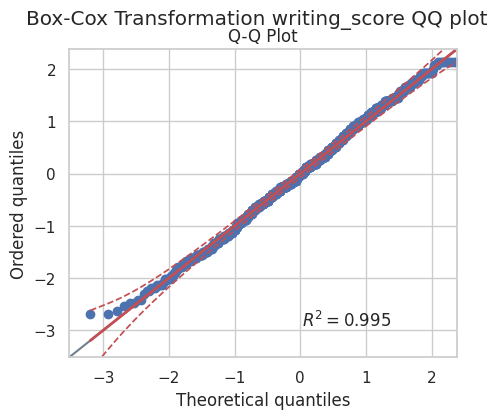

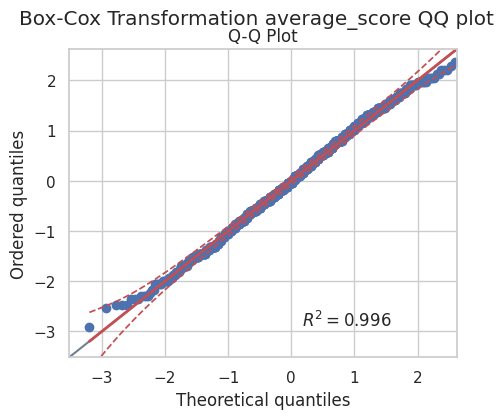

In [16]:
for column in df_box_cox.columns[5:9]:
    pg.qqplot(df_box_cox[column], dist='norm')
    plt.suptitle(f'Box-Cox Transformation {column} QQ plot')
    plt.show()

The Box-Cox transformation has improved the R2 scores slightly

Lets see what the Yeo-Johnson transformation has accomplished

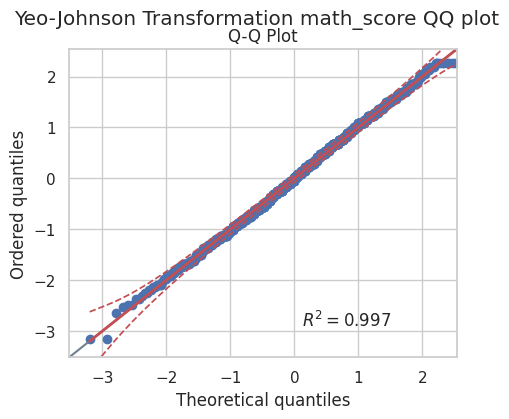

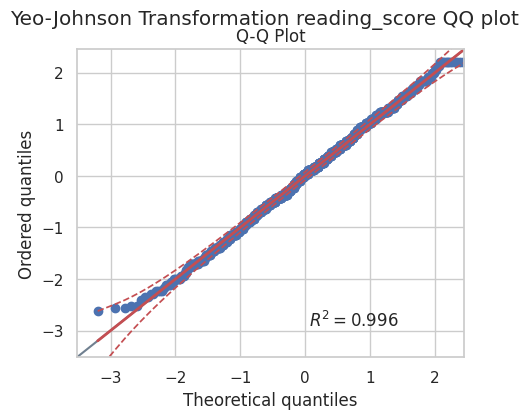

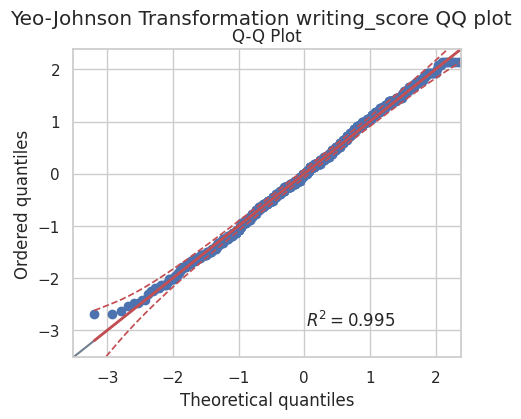

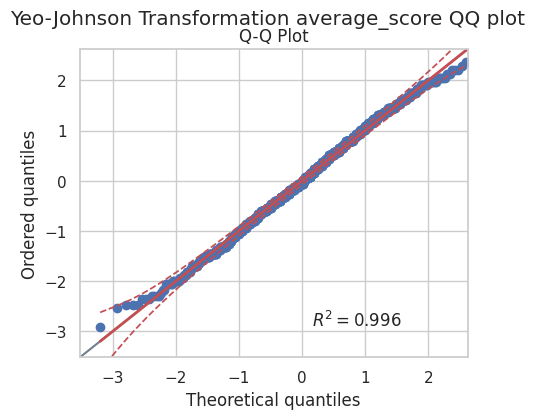

In [17]:
for column in df_yeo_johnson.columns[5:9]:
    pg.qqplot(df_yeo_johnson[column], dist='norm')
    plt.suptitle(f'Yeo-Johnson Transformation {column} QQ plot')
    plt.show()

It appears the Yeo-Johnson transformation has achieved similar results to the Box-Cox transformation

Developer's note - after noting that we have contra-indications as to the normality of the numerical data (the Shapiro-Wilk test indicates that the data is not normally distributed, but the QQ plots, R2 scores and histograms visually indicate normal distribution), I put this question to the Code Institute Predictive Analytics Slack channel.  Niel McEwan indicated that outliers in the dataset may be causing the Shapiro-Wilk test to fail. Given that the dataset contains 1000 records, even a few outliers could have an outsized effect. I also discussed this issue with my Mentor, who suggested eliminating the outliers and redoing the Shapiro-Wilk test.

## Handle Outliers

If we go back to the Pandas Profile Report and examine the very far left-hand-sides of the math_score, reading_score and writing_score histogram plots, we can see a small number of bins representing a small number of poorly performing students. These students are exactly those we want to be able to predict, but if their presence is causing the data to be abnormally distributed, then we should explore what removing these records does, and if the data quality improves as a result. If so, this would lead to better performing or more reliable models.

If we examine the KDE-histograms above more closely, then we can see that the bell shapes of the KDE lines are not symetrical. On the left hand side, they start at 0, tracking the bins holding students who score very poorly. On the right hand side, the KDE lines end at a y-axis value of approximately 15 counts. The bins with a y-axis value of 15 counts on the left hand side cover scores of roughly 40 points. Therefore, it seems like we would be best served by filtering out all records where students score less than 40. This should even up the histograms, and more normally distribute the data.

We can do this with the `query()` method, querying the dataset for all records where score is greater than 40.

Below, we call the output of the query method `df_filtered` as we have filtered out outlier records.

In [18]:
df_filtered = df.query('math_score > 40 and reading_score > 40 and writing_score > 40 and average_score > 40')
df_filtered

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,67,67,63,65
2,male,group E,some college,free/reduced,none,59,60,50,56
3,male,group B,high school,standard,none,77,78,68,74
4,male,group E,associate's degree,standard,completed,78,73,68,73
5,female,group D,high school,standard,none,63,77,76,72
...,...,...,...,...,...,...,...,...,...
994,male,group E,high school,free/reduced,completed,86,82,75,81
995,male,group C,high school,standard,none,73,70,65,69
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89
998,female,group C,some college,standard,none,73,74,82,76


It appears that the `query` method has filtered out 74 records, so we have preserved the bulk of the dataset.

Now we can generate KDE histograms and re-run the Shapiro-Wilk test.

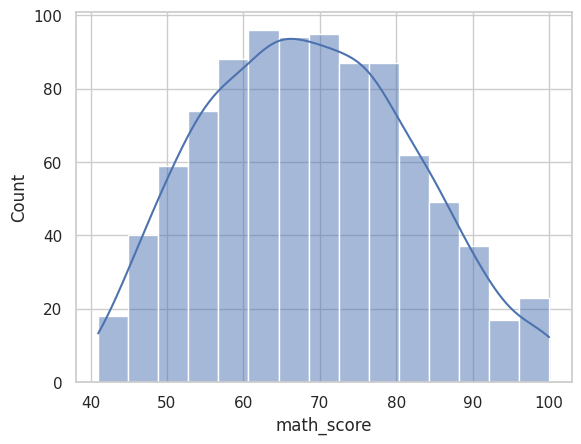

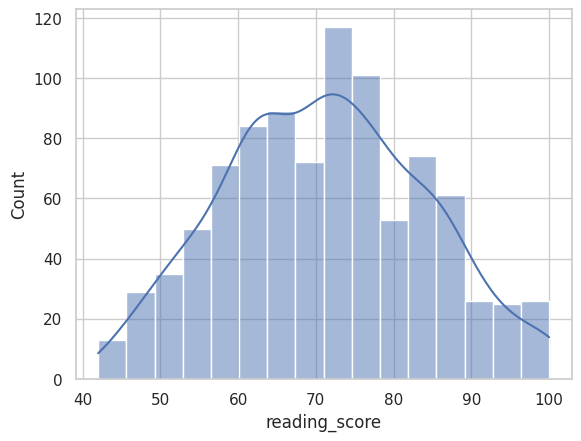

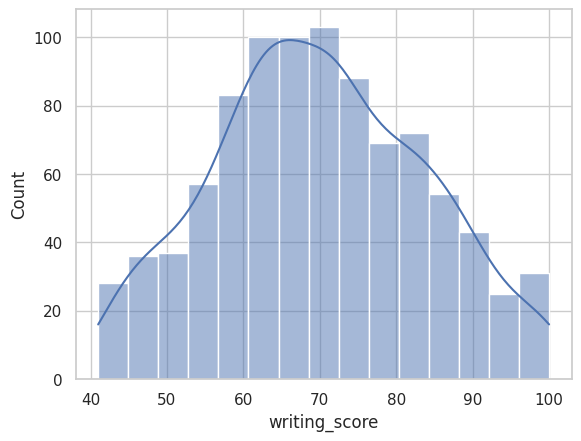

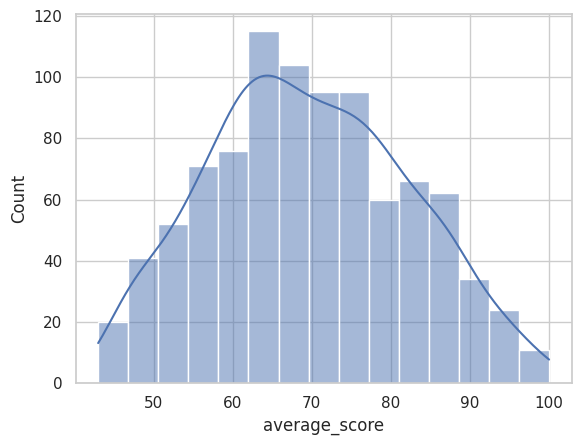

In [19]:
for column in df_filtered.columns[5:9]:
    sns.histplot(data=df_filtered, kde=True, x=column)
    plt.show()

Interesting - the bell shapes are now more spread out, but they are still recognisable as bell shapes, which at least visually indicates that the data is normally distributed. We can know for sure with the Shapiro-Wilk test:

In [20]:
pg.normality(data=df_filtered, alpha=0.05)

,W,pval,normal
math_score,0.986729,1.966832e-07,False
reading_score,0.990608,1.229061e-05,False
writing_score,0.988178,8.477993e-07,False
average_score,0.987845,6.011289e-07,False


This is an unexpected result - the P Values have been reduced, which statistical theory tells us is stronger evidence for the alternative hypothesis of the Shapiro-Wilk test, so we have bizarrely made the data *less* normally distributed. Let's adjust the `query` method criteria, and see if that improves matters - we may have been too harsh the first time.

We'll try a cut-off score of 30. We won't plot KDE histograms, as these visually indicate that the data is normally distributed, when it actually is not according to the Shapiro Wilk test, so KDE-histograms are somewhat misleading.

In [21]:
df_filtered = df.query('math_score > 30 and reading_score > 30 and writing_score > 30 and average_score > 30')
df_filtered

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,67,67,63,65
1,female,group D,some high school,free/reduced,none,40,59,55,51
2,male,group E,some college,free/reduced,none,59,60,50,56
3,male,group B,high school,standard,none,77,78,68,74
4,male,group E,associate's degree,standard,completed,78,73,68,73
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89
997,female,group C,some high school,free/reduced,none,32,35,41,36
998,female,group C,some college,standard,none,73,74,82,76


To simplify the testing process, the code cell below allows the rapid testing of various cut-off values. 

In [22]:
val = 30
df_filtered = df.query(f'math_score > {val} and reading_score > {val} and writing_score > {val} and average_score > {val}')

pg.normality(data=df_filtered, alpha=0.05)

,W,pval,normal
math_score,0.993187,0.000181,False
reading_score,0.993803,0.000431,False
writing_score,0.992089,0.000041,False
average_score,0.992933,0.000127,False


Unfortunately, extensive testing shows that none of the cut-offs between 20 and 40 are able to more normally distribute the data. However, that said, we have only been testing the removal of very low values. As noted above, this is not ideal, since these are the students we want to be able to identify. Perhaps we should look into excluding highly performing students.

In [23]:
lower = 30
upper = 95
df_filtered = df.query(f'(math_score > {lower} and math_score < {upper}) and (reading_score > {lower} and reading_score < {upper}) and (writing_score > {lower} and writing_score < {upper}) and (average_score > {lower} and average_score < {upper})')

pg.normality(data=df_filtered, alpha=0.05)

,W,pval,normal
math_score,0.989912,6.245678e-06,False
reading_score,0.985792,9.251524e-08,False
writing_score,0.988249,1.041457e-06,False
average_score,0.984612,3.138829e-08,False


Upper values between 90 and 100 were tried, and all failed to more normally distribute the data. In addition, checking the shape of the output dataframe `df_filtered` showed that these operations were excluding large amounts of data. Considering that the original dataset only has 1000 records, excluding too many would seriously hamper any attempt to train a machine learning model, simply due to too few records. This might lead to under- or over-fitting.

Unfortunately, we are forced to conclude that nothing can be done to more normally distribute the dataset at this time. This is not ideal, and will impact any later attempt to train a machine learning model. That said, the KDE-histograms for the original dataset visually indicate normal distribution. Though this interpretation is disproved by the Shapiro-Wilk test, it is likely that the dataset is not far off being normally distributed, even though we cannot achieve this by removing outliers.

Training a machine learning model with abnormally distributed data is still possible, so we should be able to proceed, even if difficulties might arise. Since this notebook is concerned with data exploration, we will study the skewness and kurtosis of the data as well.

## Skewness and Kurtosis

We will now study the skewness and kurtosis of the data. This may reveal insights.

### Skewness

We will calculate the skewness of the dataset's numerical variables using the pingouin `skew()` method.

In [24]:
df[5:9].skew()

/tmp/ipykernel_2383/2811257362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[5:9].skew()


math_score       1.994169
reading_score    0.401362
writing_score    0.505040
average_score    1.168644
dtype: float64

From the output of the skew method, we see that: 
- math_score is very heavily positively skewed - the right-hand-side tail is longer
- reading_score is fairly unskewed
- writing_score is fairly unskewed
- average_score is moderately positively skewed, which is likely due to the influence of the math_score variable in the calculation of the average_score

After discussing this with Niel, an argument can be made for writing_score being fairly symmetrical, since the rule of thumb for noticeable skewness is 0.5

### Kurtosis

We can calculate kurtosis using the `kurtosis()` method.  

In [25]:
df[5:9].kurtosis()

/tmp/ipykernel_2383/897774369.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[5:9].kurtosis()


math_score       3.981137
reading_score   -3.390737
writing_score   -2.814863
average_score    0.311114
dtype: float64

From the output of the kurtosis method, we see that: 
- math_score has a very high kurtosis. If we take another look at the Profile Report, we note that the peaks toward the center of the plot are high when compared to the surrounding peaks.
- reading_score has a highly negative kurtosis, indicating that the data is too flat
- writing_score has a highly negative kurtosis, indicating that the data is too flat
- average_score has a low kurtosis, probably because the constituent variables balance each other out

From the Skew and Kurtosis analyses, we note that the math_score variable could prove problematic when training a predictive model. The reading_score and writing_score variables could also prove problematic, albeit less-so.

## Conclusions

In this notebook, we conducted an initial data exploration, and examined the distribution of the data. We concluded that the data is not normally distributed, and that removing outliers could not improve this. Transforming the data using the Box-Cox and Yeo-Johnson transformers also fails to more normally distribute the data.

However, the QQ Plots, R2 scores and KDE-histograms visually indicate that the data is close to being normally distributed, even though we cannot achieve this. Therefore, we will proceed, and note in the notebooks dedicated to training predictive machine learning models that performance could be impacted by the abnormal distribution of the data.

## Save plots

We can now save some of the above plots for use within the Streamlit app.

Before we can save any plots, we must first create a directory within which to save them:

In [26]:
try:
  os.makedirs(name='outputs/plots/distribution') # create outputs/plots/distribution folder
except Exception as e:
  print(e)

filepath_distribution = 'outputs/plots/distribution'

[Errno 17] File exists: 'outputs/plots/distribution'


Now we can save the plots. Due to how the `savefig()` method works, we will construct each plot differently, however they are effectively the same plots as above. We will save the KDE-histograms that plot distribution, as well as the QQ plots with their R2 scores. We will not save the QQ plots constructed using the outputs of the Yeo-Johnson and Box-Cox transformations, as these, as noted, only improve the R2 scores fractionally, and since we will not use them transformed data again, they serve no further purpose.

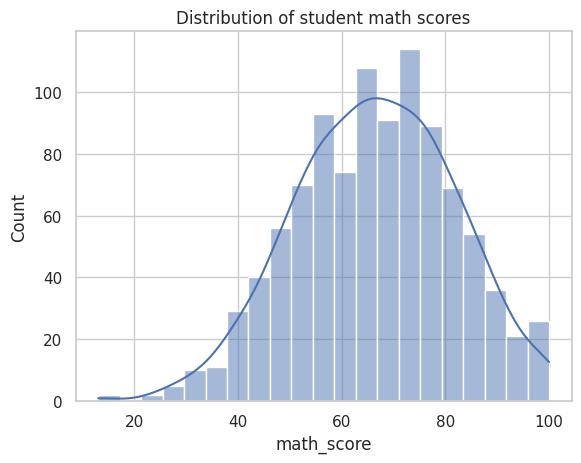

In [27]:
! rm outputs/plots/distribution/math-score-distribution-plot.png

fig_math_score_distribution = sns.histplot(data=df, kde=True, x=df['math_score'])
plt.title("Distribution of student math scores")
plt.savefig(f'{filepath_distribution}/math-score-distribution-plot.png')

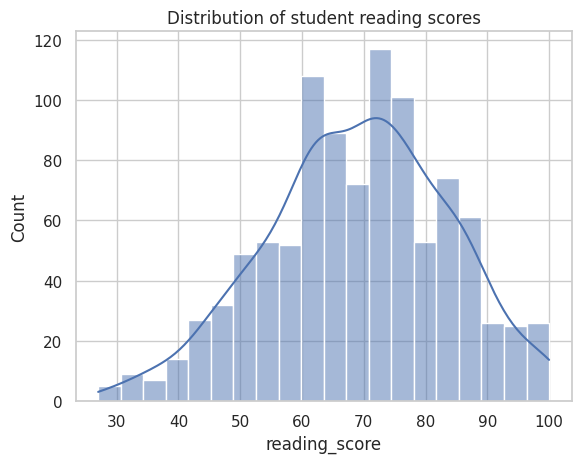

In [28]:
! rm outputs/plots/distribution/reading-score-distribution-plot.png

fig_reading_score_distribution = sns.histplot(data=df, kde=True, x=df['reading_score'])
plt.title("Distribution of student reading scores")
plt.savefig(f'{filepath_distribution}/reading-score-distribution-plot.png')

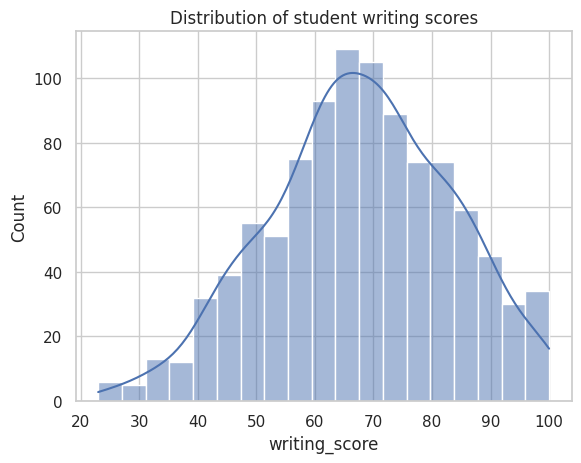

In [29]:
! rm outputs/plots/distribution/writing-score-distribution-plot.png

fig_writing_score_distribution = sns.histplot(data=df, kde=True, x=df['writing_score'])
plt.title("Distribution of student writing scores")
plt.savefig(f'{filepath_distribution}/writing-score-distribution-plot.png')

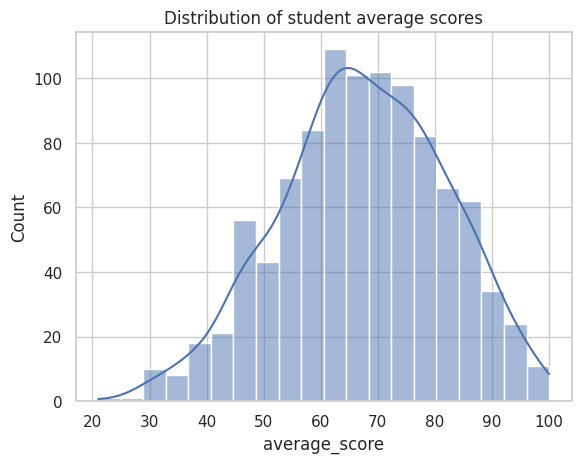

In [30]:
! rm outputs/plots/distribution/average-score-distribution-plot.png

fig_average_score_distribution = sns.histplot(data=df, kde=True, x=df['average_score'])
plt.title("Distribution of student average scores")
plt.savefig(f'{filepath_distribution}/average-score-distribution-plot.png')

Now for the QQ plots

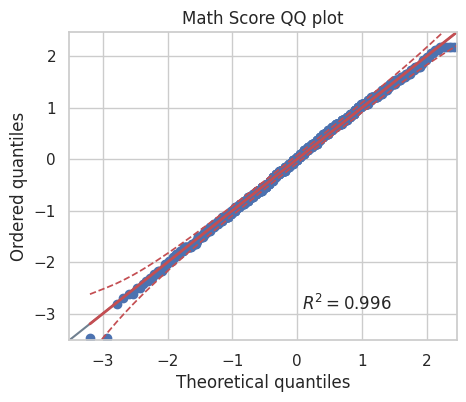

In [31]:
! rm outputs/plots/distribution/math-score-qq-plot.png

fig_math_score_qq_plot = pg.qqplot(df['math_score'], dist='norm')
plt.title("Math Score QQ plot")
plt.savefig(f'{filepath_distribution}/math-score-qq-plot.png')

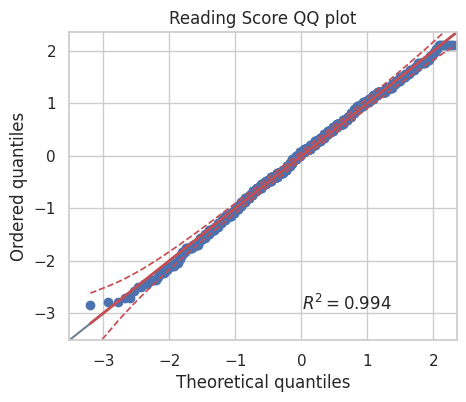

In [32]:
! rm outputs/plots/distribution/reading-score-qq-plot.png

fig_reading_score_qq_plot = pg.qqplot(df['reading_score'], dist='norm')
plt.title("Reading Score QQ plot")
plt.savefig(f'{filepath_distribution}/reading-score-qq-plot.png')

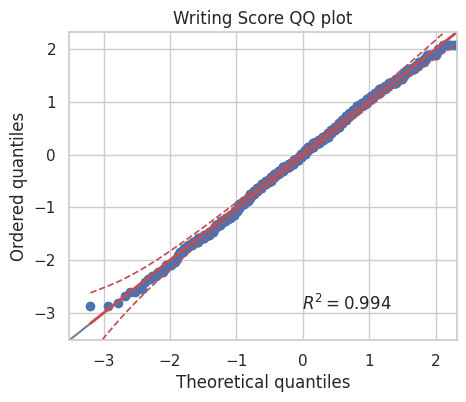

In [33]:
! rm outputs/plots/distribution/writing-score-qq-plot.png

fig_writing_score_qq_plot = pg.qqplot(df['writing_score'], dist='norm')
plt.title("Writing Score QQ plot")
plt.savefig(f'{filepath_distribution}/writing-score-qq-plot.png')

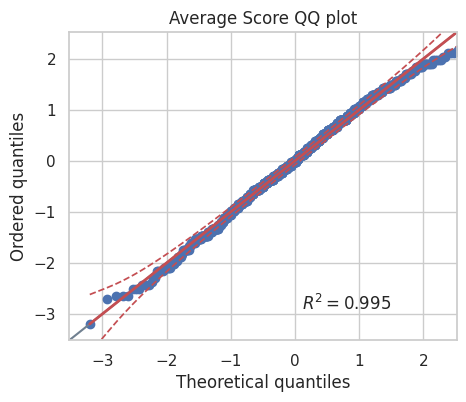

In [34]:
! rm outputs/plots/distribution/average-score-qq-plot.png

fig_average_score_qq_plot = pg.qqplot(df['average_score'], dist='norm')
plt.title("Average Score QQ plot")
plt.savefig(f'{filepath_distribution}/average-score-qq-plot.png')

We will also save the dataframe containing the results of the Shapiro-Wilk test on the original dataset:

In [35]:
try:
  os.makedirs(name='outputs/datasets/distribution') # create outputs/plots/distribution folder
except Exception as e:
  print(e)

filepath_datasets_distribution = 'outputs/datasets/distribution'

[Errno 17] File exists: 'outputs/datasets/distribution'


In [36]:
df_shapiro_wilk.to_csv(f"outputs/datasets/distribution/original-shapiro-wilk-test-results.csv", index=False)

Excellent - in the next notebook, we will examine the relationships between the categorical feature variables and the numerical target variables.